# [Lecture 8] Classification

## 1. Classification problems:

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

### Simulate 2-classes, 2-features classification data randomly.


In [2]:
from sklearn import datasets
from pandas import Series, DataFrame
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
                          n_informative = 2, n_redundant = 0, n_repeated = 0,
                          n_clusters_per_class = 1)
Data = DataFrame(X)
Data['class'] = y
Data.describe()

,0,1,class
count,200.000000,200.000000,200.00000
mean,0.060823,-1.039289,0.49500
std,1.407683,0.944451,0.50123
min,-2.871389,-3.368091,0.00000
25%,-0.940272,-1.657706,0.00000
50%,-0.135557,-1.088325,0.00000
75%,1.099780,-0.320833,1.00000
max,3.749615,1.257290,1.00000


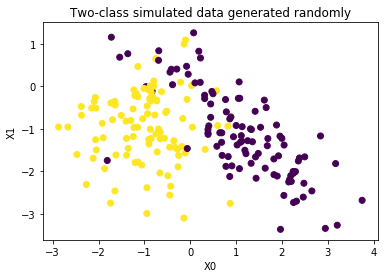

In [3]:
d = plt.scatter(X[:,0],X[:,1],marker = 'o',c = y)
d = plt.xlabel("X0")
d = plt.ylabel("X1")
d = plt.title("Two-class simulated data generated randomly")
plt.show()

### Multi-class classification examples: iris dataset

In [4]:
iris = datasets.load_iris()
irisX = iris['data']
irisy = iris.target

class names :  ['setosa' 'versicolor' 'virginica']


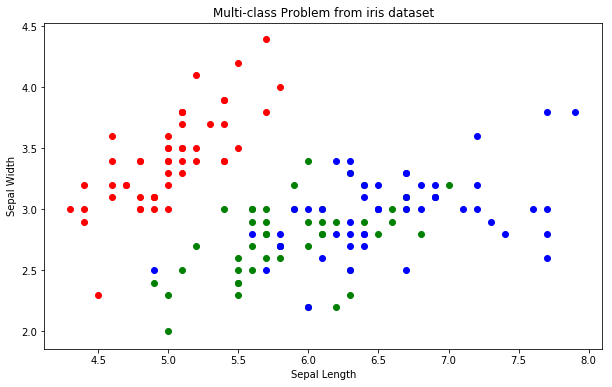

In [5]:
cols = ['red','green','blue']
fig, dummy = plt.subplots()
fig.set_size_inches(10,6)
print('class names : ',iris['target_names'])
for idx,label in enumerate(iris['target_names']):
    d = plt.scatter(x = irisX[iris['target']==idx,0],
                y = irisX[iris['target']==idx,1],
                marker = 'o',
                c = cols[idx])
d = plt.xlabel("Sepal Length")
d = plt.ylabel("Sepal Width")
d = plt.title("Multi-class Problem from iris dataset")
d = plt.show()

### Or simply:

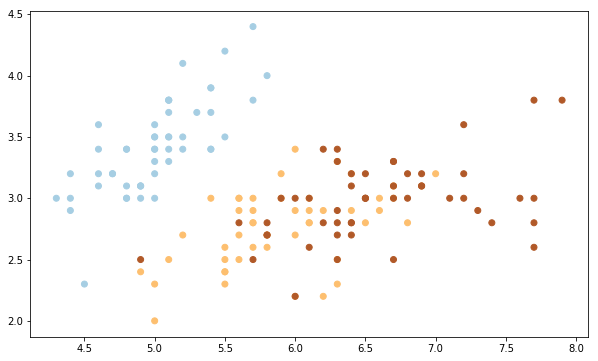

In [6]:
fig,dummy = plt.subplots()
fig.set_size_inches(10,6)
d = plt.scatter(x = irisX[:,0],y = irisX[:,1],c = iris.target, cmap = plt.cm.Paired)
plt.show()

## 2. Logistic regression:

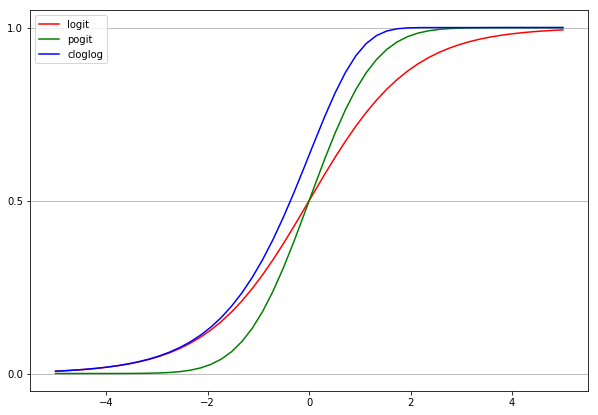

In [7]:
from numpy import linspace
from scipy.stats import norm
def logit(x):
    return 1/(1+np.exp(-x))

def pogit(x):
    return norm.cdf(x)

def cloglog(x):
    return 1-np.exp(-np.exp(x))

#Draw the three logistic function:
x = linspace(-5,5,50)
fig = plt.gcf()
fig.set_size_inches(10, 7)
dummy = plt.plot(x,logit(x),c = 'red', label = 'logit')
dummy = plt.plot(x,pogit(x),c = 'green', label = 'pogit')
dummy = plt.plot(x,cloglog(x),c = 'blue', label = 'cloglog')
dummy = plt.legend(loc = 'best')
dummy = plt.yticks([0,0.5,1])

ax = plt.gca()
dummy = ax.yaxis.grid(True)
plt.show()


### In python, sklearn.logisticRegression function can easily fit the binomial model using the logit function

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
testSize = 0.5
#X,y = make_classification(n_samples = 200, n_features = 2, n_classes = 2, 
#                          n_informative = 1, n_redundant = 0, n_repeated = 0,
#                          n_clusters_per_class = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = testSize,random_state = 0)

fit_lgs = LogisticRegression()
fit_lgs.fit(X_train,y_train)
print("This is the fitted parameters for logistic regression: ",fit_lgs.coef_)

This is the fitted parameters for logistic regression:  [[-2.21642007 -0.79304873]]


# 2.1 Decision boundary:

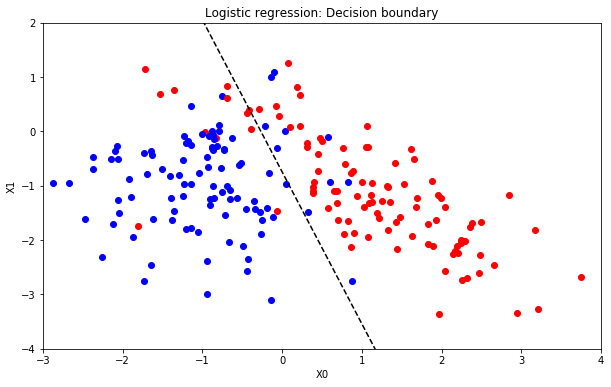

In [9]:
cols = ['red','blue']
fig, dummy = plt.subplots()
fig.set_size_inches(10,6)
xlim = plt.xlim([-3,4])
ylim = plt.ylim([-4,2])
for idx,label in enumerate(y) :
    dummy =  plt.scatter(x = X[idx,0], y = X[idx,1],
                marker = 'o',
                c = cols[label])
dummy = plt.xlabel("X0")
dummy = plt.ylabel("X1")
dummy = plt.title("Logistic regression: Decision boundary")

coef = fit_lgs.coef_[0]
intercept = fit_lgs.intercept_[0]
abValues = [-intercept/coef[1] - (coef[0]/coef[1])*x for x in linspace(-3,4,100)]
dummy =plt.plot(linspace(-3,4,100),abValues, linestyle = '--',color = 'black')


plt.show()

In [10]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from matplotlib.colors import ListedColormap
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))

#This function is used to draw colorful decision regions according to different classifiers
#and data.
def plot_decision_regions(X, y, classifier, test_idx=None, 
                          resolution=0.02, xlabel='', ylabel='', title=''):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

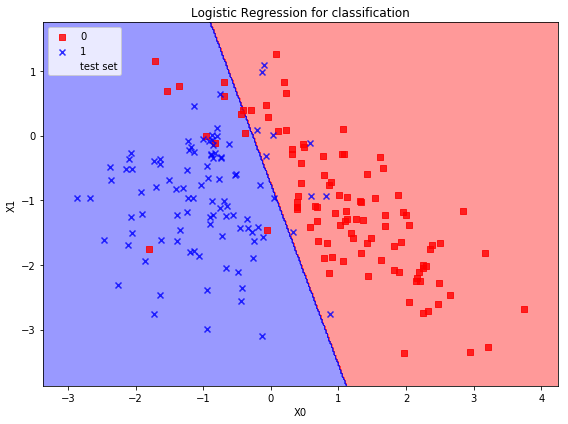

In [11]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

test_idx = range(X_train.shape[0], X_combined.shape[0])

plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = fit_lgs,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='Logistic Regression for classification')

## Softmax Regression for multi-calss classification:

In python, softmax regression is implemented in same method in sklearn.LogisticRegression. Besides, it automatically use softmax if the number of classes is greater than 2.

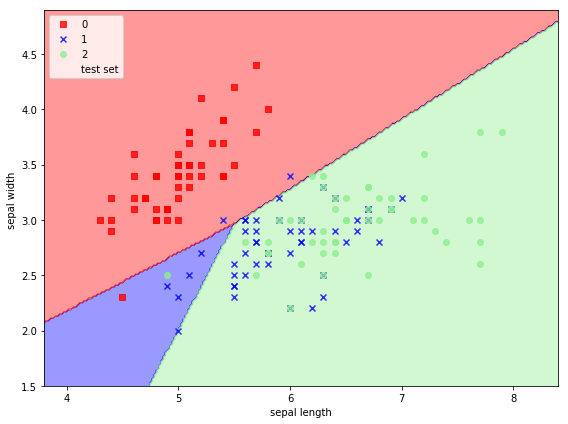

In [12]:
testSize = 0.2
irisX_train,irisX_test,irisy_train,irisy_test =\
train_test_split(irisX[:,[0,1]],irisy,test_size = testSize,random_state = 0)

lr = LogisticRegression()
lr.fit(irisX_train, irisy_train)


irisX_combined = np.vstack((irisX_train, irisX_test))
irisy_combined = np.hstack((irisy_train, irisy_test))

iristest_idx = range(irisX_train.shape[0], irisX_combined.shape[0])
#print(irisy_combined)
plot_decision_regions(X = irisX_combined, y = irisy_combined,
                      classifier = lr, 
                      test_idx = iristest_idx,
                      xlabel='sepal length', 
                      ylabel='sepal width ')

## 4. Two Other Method:
### 4.1 Discriminant Anaysis

In python, we use sklearn.discriminant_analysis package to do LDA and QDA classification:

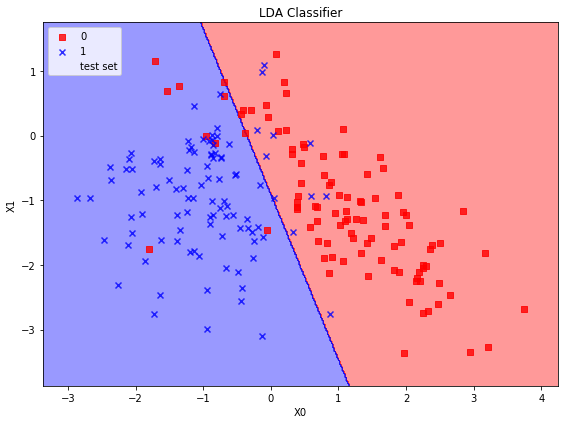

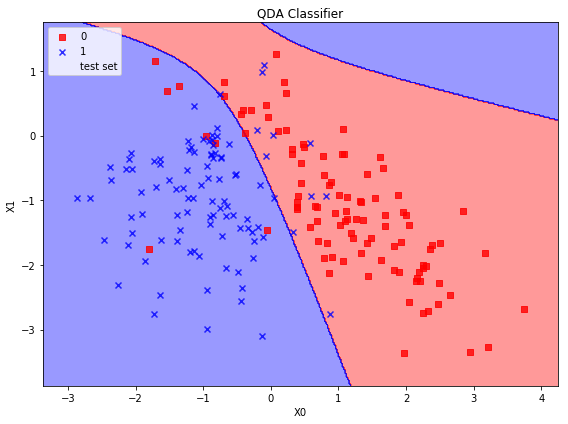

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
lda = LDA()
lda.fit(X_train, y_train)

qda = QDA()
qda.fit(X_train,y_train)

#plt.subplot(1,2,1)
plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = lda,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='LDA Classifier')
#plt.subplot(1,2,2)
plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = qda,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='QDA Classifier')

### Classification on iris dataset:

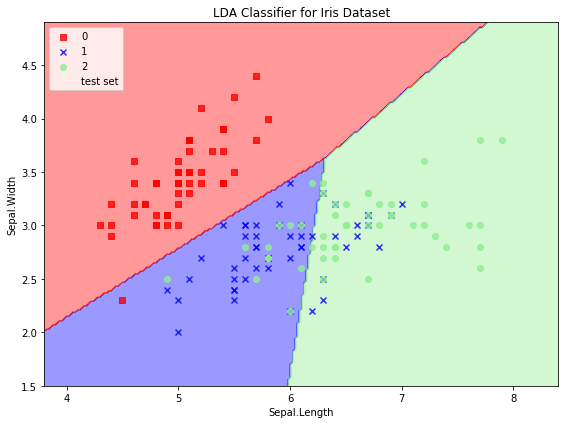

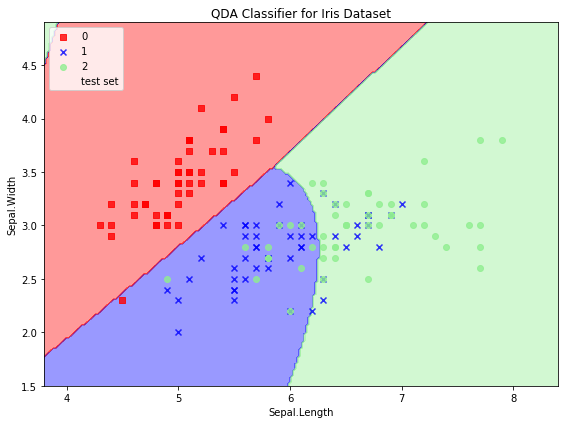

In [14]:
iris_lda = LDA()
iris_lda.fit(irisX_train,irisy_train)

iris_qda = QDA()
iris_qda.fit(irisX_train, irisy_train)

plot_decision_regions(X=irisX_combined,y=irisy_combined,
                      classifier = iris_lda,test_idx=iristest_idx,
                      xlabel='Sepal.Length', ylabel='Sepal.Width', title='LDA Classifier for Iris Dataset')

plot_decision_regions(X=irisX_combined,y=irisy_combined,
                      classifier = iris_qda,test_idx=iristest_idx,
                      xlabel='Sepal.Length', ylabel='Sepal.Width', title='QDA Classifier for Iris Dataset')

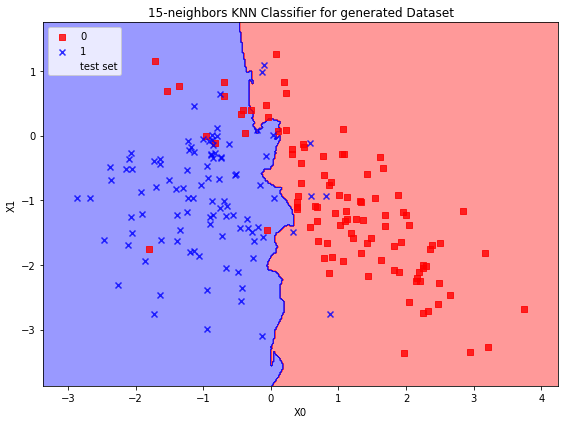

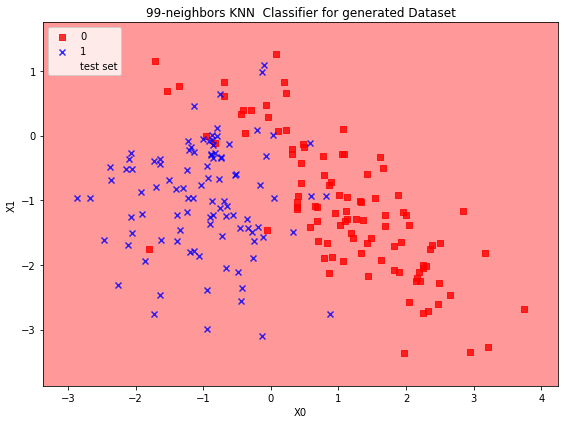

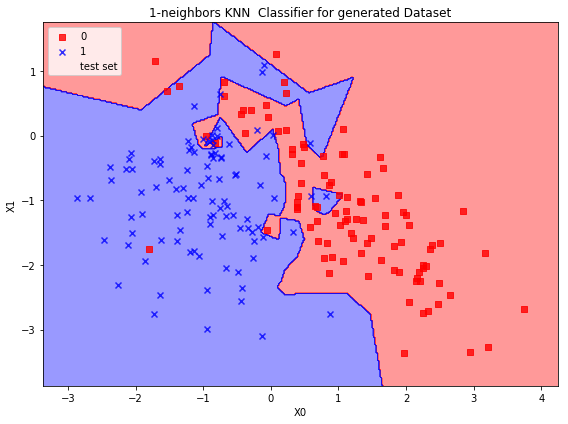

In [15]:
from sklearn.neighbors import KNeighborsClassifier as KNN

knn15 = KNN(n_neighbors = 15)
knn15.fit(X_train, y_train)

knn99 = KNN(n_neighbors = 99)
knn99.fit(X_train, y_train)

knn1 = KNN(n_neighbors = 1)
knn1.fit(X_train, y_train)

plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = knn15,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='15-neighbors KNN Classifier for generated Dataset')

plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = knn99,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='99-neighbors KNN  Classifier for generated Dataset')

plot_decision_regions(X=X_combined,y=y_combined,
                      classifier = knn1,test_idx=test_idx,
                      xlabel='X0', ylabel='X1', title='1-neighbors KNN  Classifier for generated Dataset')

Use KNN to fit iris dataset:

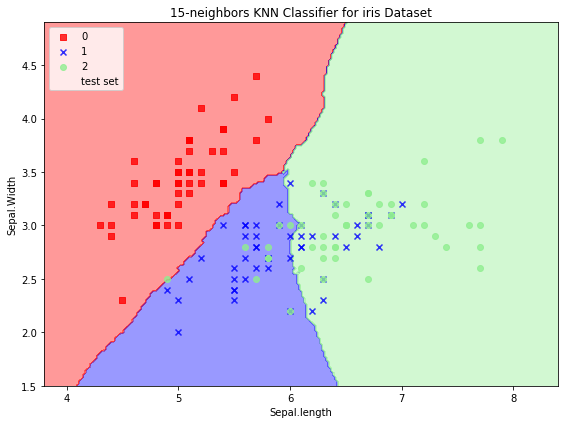

In [16]:
knn15 = KNN(n_neighbors = 15)
knn15.fit(irisX_train, irisy_train)

plot_decision_regions(X=irisX_combined,y=irisy_combined,
                      classifier = knn15,test_idx=iristest_idx,
                      xlabel='Sepal.length', ylabel='Sepal.Width', title='15-neighbors KNN Classifier for iris Dataset')



## Classification Error Analysis:
### 5.1 Confusion matrix:
Based on iris dataset:

In [17]:
## ytrue FALSE TRUE
##     0    TN   FP
##     1    FN   TP

[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]


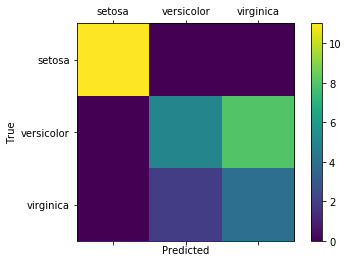

In [27]:
from sklearn.metrics import confusion_matrix
y_predict = knn15.predict(irisX_test)

labels = [0,1,2]
dic = ['setosa', 'versicolor','virginica']
cm = confusion_matrix(irisy_test, y_predict)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#dummy = plt.title('Confusion matrix of the classifier')
dummy = fig.colorbar(cax)
dummy = ax.set_xticklabels([''] + dic)
dummy = ax.set_yticklabels([''] + dic)
dummy = plt.xlabel('Predicted')
dummy = plt.ylabel('True')
dummy = plt.show()

## 5.2 ROC curve:

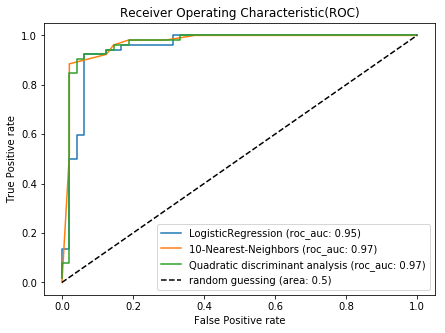

In [20]:
from sklearn.metrics import roc_curve,auc

fig = plt.figure(figsize = (7,5))

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_fit1 = lr.predict_proba(X_test)
(fpr1,tpr1,thre1) = roc_curve(y_test,y_fit1[:,1])
roc_auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,
         tpr1,
         label = 'LogisticRegression (roc_auc: %0.2f)'%roc_auc1)


knn10 = KNN(n_neighbors = 10)
knn10.fit(X_train, y_train)
y_fit2 = knn10.predict_proba(X_test)
(fpr2,tpr2,thre2) = roc_curve(y_test,y_fit2[:,1])
roc_auc2 = auc(fpr2,tpr2)
plt.plot(fpr2,
         tpr2,
         label = '10-Nearest-Neighbors (roc_auc: %0.2f)'%roc_auc2)



qda  =QDA()
qda.fit(X_train, y_train)
y_fit3 = qda.predict_proba(X_test)
(fpr3,tpr3,thre3) = roc_curve(y_test,y_fit3[:,1])
roc_auc3 = auc(fpr3,tpr3)
plt.plot(fpr3,
         tpr3,
         label = 'Quadratic discriminant analysis (roc_auc: %0.2f)'%roc_auc3)

plt.plot([0,1],
         [0,1],
         linestyle = '--',
         color = 'black',
         label = 'random guessing (area: 0.5)')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristic(ROC)')

plt.legend(loc = "lower right")
plt.show()